## Figuring out if the fact that a Role is Remote affects the Salary

### Methodology

 1. Grouping the data by Job Titles and Remoteness
 2. Filtering the most high-paying remote and non-remote jobs
 3. Plot final finding using two horizontal bar charts or a double horizontal bar chart

In [2]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import ast

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [3]:
list_countries = [
    "Austria",
    "Belgium",
    "Bulgaria",
    "Croatia",
    "Cyprus",
    "Czech Republic",
    "Denmark",
    "Estonia",
    "Finland",
    "France",
    "Germany",
    "Greece",
    "Hungary",
    "Ireland",
    "Italy",
    "Latvia",
    "Lithuania",
    "Luxembourg",
    "Malta",
    "Netherlands",
    "Poland",
    "Portugal",
    "Romania",
    "Slovakia",
    "Slovenia",
    "Spain",
    "Sweden",
    "United States"
]

list_jobs = [
    'Senior Data Engineer',
    'Senior Data Scientist',
    'Data Engineer',
    'Data Scientist',
    'Data Analyst',
    'Machine Learning Engineer'
]

df_EUnUS = df[df['job_country'].isin(list_countries)].dropna(subset='salary_year_avg').copy()
df_EUnUS = df[df['job_title_short'].isin(list_jobs)].copy()
df_EUnUS

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,"[r, python, sql, nosql, power bi, tableau]","{'analyst_tools': ['power bi', 'tableau'], 'pr..."
2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,Germany,2023-10-10 13:14:55,False,False,Germany,None,NaN,NaN,ALPHA Augmented Services,"[python, sql, c#, azure, airflow, dax, docker,...","{'analyst_tools': ['dax'], 'cloud': ['azure'],..."
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,"[python, c++, java, matlab, aws, tensorflow, k...","{'cloud': ['aws'], 'libraries': ['tensorflow',..."
4,Data Engineer,Data Engineer- Sr Jobs,"Washington, DC",via Clearance Jobs,Full-time,False,Sudan,2023-08-07 14:29:36,False,False,Sudan,None,NaN,NaN,Kristina Daniel,"[bash, python, oracle, aws, ansible, puppet, j...","{'cloud': ['oracle', 'aws'], 'other': ['ansibl..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785731,Data Engineer,Data Engineer,"Overland Park, Kansas, Amerika Serikat",melalui LinkedIn,Pekerjaan tetap,False,Sudan,2023-03-12 06:32:17,False,False,Sudan,None,NaN,NaN,Shamrock Trading Corporation,"[nosql, mongodb, mongodb, python, elasticsearc...","{'analyst_tools': ['excel'], 'cloud': ['aws', ..."
785732,Data Engineer,Data Engineer (f/m/d),"Heidelberg, Jerman",melalui Top County Careers,Pekerjaan tetap,False,Germany,2023-03-13 06:18:59,False,False,Germany,None,NaN,NaN,Heidelberg Materials,"[python, c#, java, scala, sql, postgresql, sql...","{'cloud': ['azure', 'databricks'], 'databases'..."
785735,Senior Data Engineer,Senior Data Engineer,"Berlin, Jerman",melalui Top County Careers,Pekerjaan tetap,False,Germany,2023-03-13 06:19:07,False,False,Germany,None,NaN,NaN,Pure App,"[sql, python, bigquery, aws, airflow, fastapi,...","{'cloud': ['bigquery', 'aws'], 'libraries': ['..."
785737,Data Analyst,CRM Data Analyst,"Bad Rodach, Jerman",melalui BeBee Deutschland,Pekerjaan tetap,False,Germany,2023-03-12 06:18:18,False,False,Germany,None,NaN,NaN,HABA FAMILYGROUP,"[sas, sas, sql, excel]","{'analyst_tools': ['sas', 'excel'], 'programmi..."


In [4]:
df_EU_remote = df_EUnUS[df_EUnUS['job_work_from_home']==True].copy()
df_EU_nonremote = df_EUnUS[df_EUnUS['job_work_from_home']==False].copy()

DF_EU_r = df_EU_remote.groupby('job_title_short')['salary_year_avg'].agg(['median', 'count']).sort_values(by='median', ascending=False)
DF_EU_nr = df_EU_nonremote.groupby('job_title_short')['salary_year_avg'].agg(['median', 'count']).sort_values(by='median', ascending=False)

DF_EU_r

,median,count
job_title_short,,
Senior Data Scientist,160000.0,337
Senior Data Engineer,145000.0,283
Data Scientist,136000.0,949
Data Engineer,130000.0,751
Machine Learning Engineer,127500.0,40
Data Analyst,86750.0,610


In [5]:
DF_EU_nr

,median,count
job_title_short,,
Senior Data Scientist,152650.0,1353
Senior Data Engineer,147500.0,1308
Data Engineer,125000.0,3749
Data Scientist,125000.0,4973
Machine Learning Engineer,104668.0,536
Data Analyst,90000.0,4841


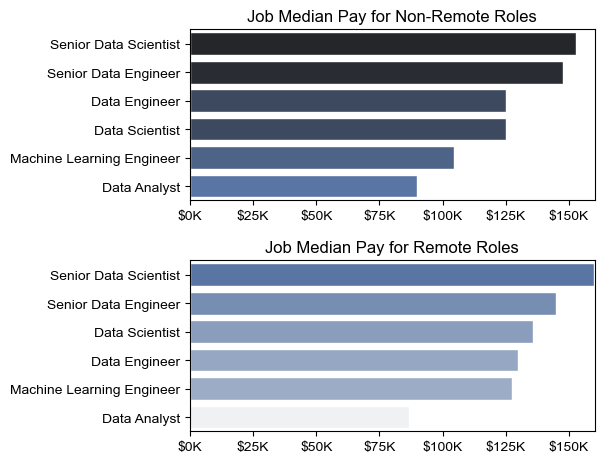

In [6]:
import seaborn as sns

fig, ax = plt.subplots(2, 1)

sns.set_theme(style="ticks")


sns.barplot(data=DF_EU_nr, x='median', y='job_title_short', ax=ax[0], hue='median', palette='dark:b_r', legend=False)
ax[0].set_title('Job Median Pay for Non-Remote Roles')
ax[0].set_xlabel('')
ax[0].set_ylabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos:f'${int(y/1000)}K'))


sns.barplot(data=DF_EU_r, x='median', y='job_title_short', ax=ax[1], hue='median', palette='light:b', legend=False)
ax[1].set_xlim(ax[0].get_xlim())
ax[1].set_title('Job Median Pay for Remote Roles')
ax[1].set_xlabel('')
ax[1].set_ylabel('')
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos:f'${int(y/1000)}K'))

fig.tight_layout()
plt.show()

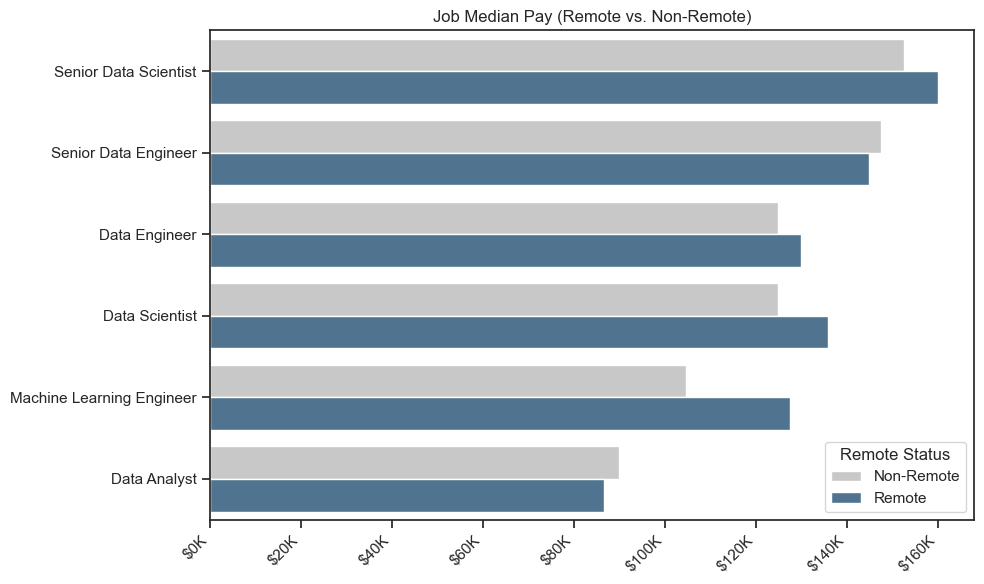

In [7]:
DF_EU_nr['remote'] = 'Non-Remote'
DF_EU_r['remote'] = 'Remote'

DF_EUnUS = pd.concat([DF_EU_nr, DF_EU_r], ignore_index=False)


fig, ax = plt.subplots(figsize=(10, 6))

pastel_palette = ["#C8C8C8", "#467599"]

sns.barplot(data=DF_EUnUS, x='median', y='job_title_short', hue='remote', ax=ax, palette=pastel_palette)

ax.set_title('Job Median Pay (Remote vs. Non-Remote)')
ax.set_xlabel('')
ax.set_ylabel('')
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos:f'${int(y/1000)}K'))

ax.legend(title='Remote Status')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
